##  **Brightness Control With Hand Detection using OpenCV in Python**

**Installing Libraries into the System**

In [12]:
# pip install opencv-python
# pip install mediapipe
# pip install screen-brightness-control

**importing all needed Libraries for this Program**

In [13]:
import cv2  
import mediapipe as mp  
from math import hypot  
import screen_brightness_control as sbc  
import numpy as np 

**Initialising / Creating object nessesary for classes**

In [14]:
mpHands = mp.solutions.hands   
hands = mpHands.Hands(max_num_hands=1) 
Draw = mp.solutions.drawing_utils  

**Lets Go !!**

In [20]:
cap = cv2.VideoCapture(0) 

while True: 
	_, frame = cap.read()    
	frame = cv2.flip(frame, 1)   
	frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)   
	Process = hands.process(frameRGB)  

	landmarkList = [] 

	if Process.multi_hand_landmarks:   	
		for handlm in Process.multi_hand_landmarks:  
			for _id, landmarks in enumerate(handlm.landmark):
				height, width, color_channels = frame.shape   
				x, y = int(landmarks.x*width), int(landmarks.y*height)
				landmarkList.append([_id, x, y])  
			Draw.draw_landmarks(frame, handlm, 
								mpHands.HAND_CONNECTIONS)   

	if landmarkList != []:  
		x_1, y_1 = landmarkList[4][1], landmarkList[4][2] 
		x_2, y_2 = landmarkList[8][1], landmarkList[8][2]  
		cv2.circle(frame, (x_1, y_1), 7, (0, 255, 0), cv2.FILLED) 
		cv2.circle(frame, (x_2, y_2), 7, (0, 255, 0), cv2.FILLED) 
		cv2.line(frame, (x_1, y_1), (x_2, y_2), (0, 255, 0), 3) 
		L = hypot(x_2-x_1, y_2-y_1)  
		b_level = np.interp(L, [15, 220], [0, 100])  
		sbc.set_brightness(int(b_level))  


	cv2.imshow('Image', frame) 
	if cv2.waitKey(1) == ord('q'): 
		cap.release()
		cv2.destroyAllWindows()
		break


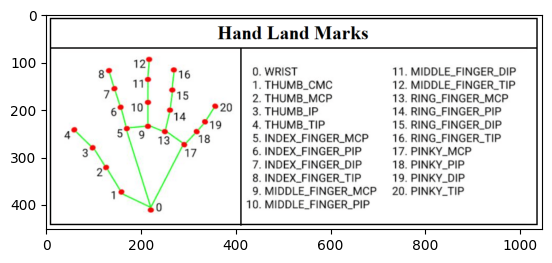

In [10]:
import matplotlib.pyplot as plt

img = plt.imread("F:/DESKTOP FOLDERS/Luminar/PROJECTS/Brightness Control with openCV/HandLandmarks.png")
plt.imshow(img)
plt.show()